# Scaling data

Some machine learning algorithms in the *sklearn* library are affected by data measured using different scales. For example if one meaure is in centimeters (one hundreth of a meter) and another is in micrometers (one millionth of a meter) the results may not be optimal.

Sklearn has scaling functions in the preprocessing module
* http://scikit-learn.org/stable/modules/preprocessing.html

In [2]:
%matplotlib inline

from sklearn import datasets
from sklearn import preprocessing


from sklearn import linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Load the [Iris](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) dataset. It has three kinds of Irises with each Iris species stored in 50 consecutive rows. Loading the second and third Iris species stored from row 50 and above create a subset of the data.

In [3]:
iris = datasets.load_iris()
iris_subset = iris.data[50:,0:2]
target_subset = iris.target[50:]

Display the two species *versicolor* and *virginica* with two axis: sepal length and sepal width. The sepal length is in centimeters and the sepal width is in micrometers.

In [4]:
df1 = pd.DataFrame(iris_subset, columns=iris.feature_names[0:2])
df1['species'] = target_subset
df1['species_names'] = df1.species
df1.replace({'species_names':{
            0:iris['target_names'][0],
            1:iris['target_names'][1],
            2:iris['target_names'][2]            
        }}, inplace=True)
df1.columns = [item.replace(' (cm)', '') for item in df1.columns]
df1['sepal width'] = df1['sepal width'] * 10000

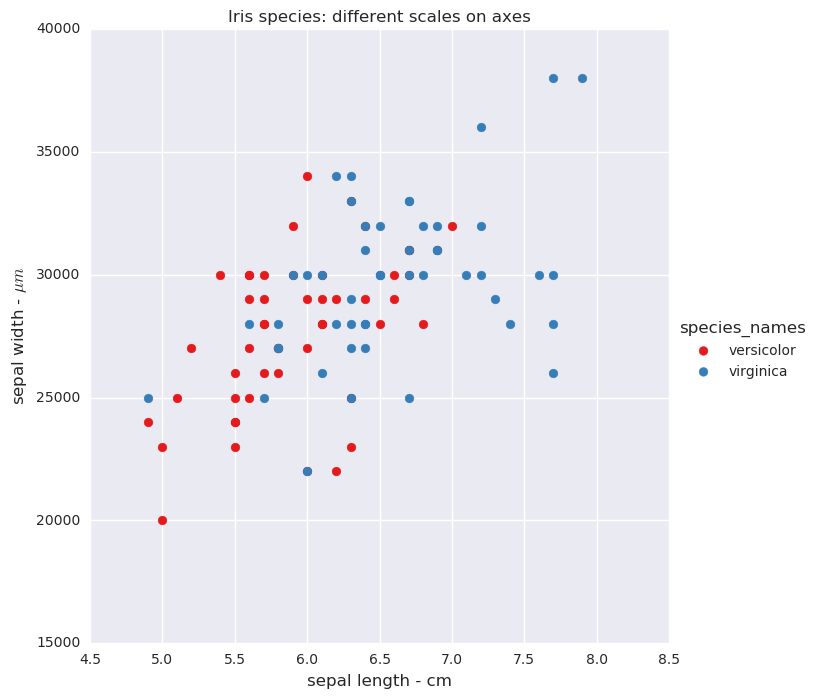

In [40]:
plt.rcParams.update({'axes.labelsize': 'large'})
plt.rcParams.update({'axes.titlesize': 'large'})

g = sns.FacetGrid(df1, hue='species_names', size=7, palette='Set1')
ax = g.map(plt.scatter, 'sepal length', 'sepal width', s=40)
ax.set_xlabels(label='sepal length - cm')
ax.set_ylabels(label='sepal width - $\mu m$')
g.add_legend()
g.fig.gca().set_title('Iris species: different scales on axes')

Using the [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function in `sklearn` the measures are converted to have a mean of zero and variance of one.

In [6]:
scaled_data = preprocessing.scale(iris_subset)

In [32]:
df2 = pd.DataFrame(scaled_data, columns=iris.feature_names[0:2])
df2['species'] = target_subset
df2['species_names'] = df2.species
df2.replace({'species_names':{
            0:iris['target_names'][0],
            1:iris['target_names'][1],
            2:iris['target_names'][2]            
        }}, inplace=True)
df2.columns = [item.replace(' (cm)', '') for item in df2.columns]
df2.describe()

,sepal length,sepal width,species
count,1.000000e+02,1.000000e+02,100.000000
mean,3.288481e-15,4.496403e-17,1.500000
std,1.005038e+00,1.005038e+00,0.502519
min,-2.065164e+00,-2.633780e+00,1.000000
25%,-7.005180e-01,-5.195071e-01,1.000000
50%,5.761837e-02,8.457092e-02,1.500000
75%,6.641275e-01,4.621197e-01,2.000000
max,2.483655e+00,2.802922e+00,2.000000


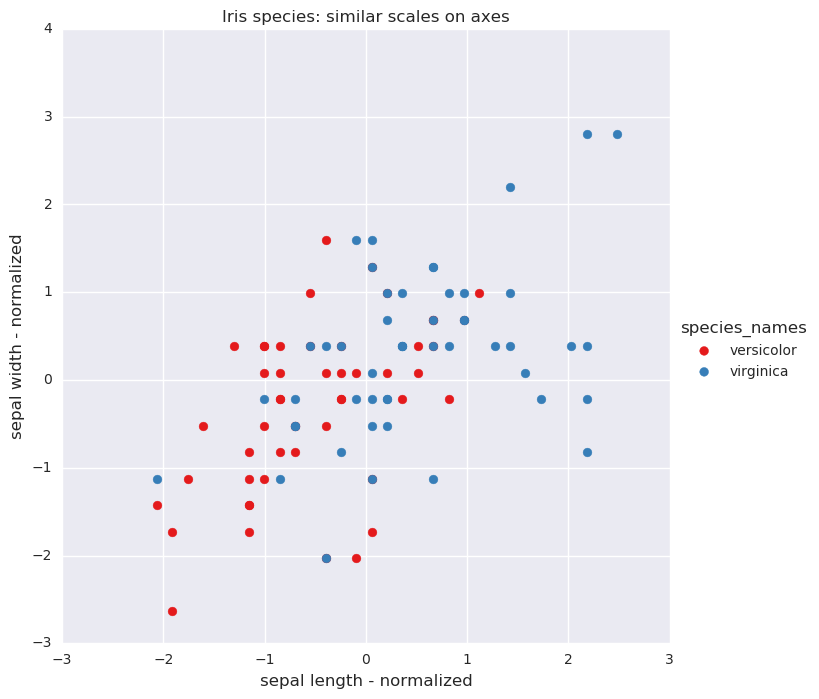

In [41]:
plt.rcParams.update({'axes.labelsize': 'large'})
plt.rcParams.update({'axes.titlesize': 'large'})

g = sns.FacetGrid(df2, hue='species_names', size=7, palette='Set1')
ax = g.map(plt.scatter, 'sepal length', 'sepal width', s=40)
ax.set_xlabels(label='sepal length - normalized')
ax.set_ylabels(label='sepal width - normalized')
g.add_legend()
g.fig.gca().set_title('Iris species: similar scales on axes')

Create a function to get metrics for optimization

In [9]:
def get_metrics(target, predict, name):
    return {
        'classifier': name,
        'accuracy': accuracy_score(target, predict),
        'precision': precision_score(target, predict),
        'recall': recall_score(target, predict)
    }

def getLogisticRegressionMetrics(X, y, name):
    logreg = linear_model.LogisticRegression(C=1e5)
    logreg.fit(X, y)
    predict = logreg.predict(X)
    return get_metrics(y, predict, name)

def getDecisionTreeMetrics(X, y, name):
    clf = tree.DecisionTreeClassifier(max_depth=10)
    clf.fit(X, y)
    predict = clf.predict(X)
    return get_metrics(y, predict, name)

Use a logistic regression classifier on the data with different scales

In [9]:
X = df1[['sepal length', 'sepal width']].values
y = df1.species
name = 'Logistic regression: different scales'
result1 = getLogisticRegressionMetrics(X, y, name)

Use a logistics regression classifer on the normalized data

In [10]:
X = df2[['sepal length', 'sepal width']].values
y = df2.species
name = 'Logistic regression: normalized data'
result2 = getLogisticRegressionMetrics(X, y, name)

Use a decision tree classifier on the data with different scales

In [11]:
X = df1[['sepal length', 'sepal width']].values
y = df1.species
name = 'Decision tree: different scales'
result3 = getDecisionTreeMetrics(X, y, name)

Use a decision tree classifer on the normalized data

In [12]:
X = df2[['sepal length', 'sepal width']].values
y = df2.species
name = 'Decision tree: normalized data'
result4 = getDecisionTreeMetrics(X, y, name)

Compare the results

In [13]:
pd.DataFrame(
    [result1, result2, result3, result4],
    columns=['classifier', 'accuracy', 'precision', 'recall'])

,classifier,accuracy,precision,recall
0,Logistic regression: different scales,0.56,0.578947,0.44
1,Logistic regression: normalized data,0.75,0.745098,0.76
2,Decision tree: different scales,0.88,0.816667,0.98
3,Decision tree: normalized data,0.88,0.816667,0.98
